In [39]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [4]:
# Load and view data, total 7 data tables
# 1. SKUs Data
skus = pd.read_csv('sku_data.csv')
# 2. Users data
users = pd.read_csv('user_data.csv')
# 3. Order data
orders = pd.read_csv('order_data.csv')
# 4. Click data
clicks = pd.read_csv('click_data.csv')
# 5. Delivery data
delivery = pd.read_csv('delivery_data.csv')
# 6. Inventory data
inventory = pd.read_csv('inventory_data.csv')
# 7. Network data
network = pd.read_csv('network_data.csv')

In [5]:
# Sample of skus data
print("size = {}\nShape = {}".format(skus.size, skus.shape))
print(skus.columns)

size = 223076
Shape = (31868, 7)
Index(['sku_ID', 'type', 'brand_ID', 'attribute1', 'attribute2',
       'activate_date', 'deactivate_date'],
      dtype='object')


In [6]:
skus.head()

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
0,a234e08c57,1,c3ab4bf4d9,3.0,60.0,NaN,NaN
1,6449e1fd87,1,1d8b4b4c63,2.0,50.0,NaN,NaN
2,09b70fcd83,2,eb7d2a675a,3.0,70.0,NaN,NaN
3,acad9fed04,2,9b0d3a5fc6,3.0,70.0,NaN,NaN
4,2fa77e3b4d,2,b681299668,-,-,NaN,NaN


In [7]:
skus['brand_ID'].unique().size

1890

In [8]:
 # Sample of users data
users.head()

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
0,000089d6a6,1,2017-08,0,F,26-35,S,3,4,3
1,0000babd1f,1,2018-03,0,U,U,U,-1,-1,-1
2,0000bc018b,3,2016-06,0,F,>=56,M,3,2,3
3,0000d0e5ab,3,2014-06,0,M,26-35,M,3,2,2
4,0000dce472,3,2012-08,1,U,U,U,-1,-1,-1


In [9]:
 # Sample of clicks data
clicks.head()

,sku_ID,user_ID,request_time,channel
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat
1,6449e1fd87,-,2018-03-01 16:13:48,wechat
2,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat
3,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat
4,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat


In [10]:
 # Sample of orders data
orders.head().T

,0,1,2,3,4
order_ID,d0cf5cc6db,7444318d01,f973b01694,8c1cec8d4b,d43a33c38a
user_ID,0abe9ef2ce,33a9e56257,4ea3cf408f,b87cb736cb,4829223b6f
sku_ID,581d5b54c1,067b673f2b,623d0a582a,fc5289b139,623d0a582a
order_date,2018-03-01,2018-03-01,2018-03-01,2018-03-01,2018-03-01
order_time,2018-03-01 17:14:25.0,2018-03-01 11:10:40.0,2018-03-01 09:13:26.0,2018-03-01 21:29:50.0,2018-03-01 19:13:37.0
quantity,1,1,1,1,1
type,2,1,1,1,1
promise,-,2,2,2,1
original_unit_price,89,99.9,78,61,78
final_unit_price,79,53.9,58.5,35,53


In [26]:
orders['sku_ID'].unique().size

9159

In [8]:
# Sample of delivery data
delivery.head()

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
0,dc3d6d2258,dc3d6d2258,1,2018-03-01 08:00:00,2018-03-01 15:00:00,2018-03-01 18:00:00
1,19802a570c,19802a570c,1,2018-03-01 10:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
2,e22627af66,e22627af66,1,2018-03-01 11:00:00,2018-03-01 15:00:00,2018-03-01 17:00:00
3,50d11a586d,50d11a586d,1,2018-03-01 10:00:00,2018-03-01 16:00:00,2018-03-01 19:00:00
4,a3bfe38bf4,a3bfe38bf4,1,2018-03-01 11:00:00,2018-03-01 16:00:00,2018-03-01 17:00:00


In [9]:
# Sample of inventory data
inventory.head()

,dc_ID,sku_ID,date
0,9,50f6f91962,2018-03-01
1,9,7f0ddbcdde,2018-03-01
2,9,8ad5789d74,2018-03-01
3,9,468d34eda4,2018-03-01
4,9,460afaddb6,2018-03-01


In [10]:
# Sample of network data
network.head()

,region_ID,dc_ID
0,2,57
1,2,43
2,2,42
3,2,66
4,2,20


In [11]:
# Let's explore the data further by looking at the full customer experience of a random customer
orders[orders['order_ID']=='81a6fa818d'].T

,47253,47254
order_ID,81a6fa818d,81a6fa818d
user_ID,2c511cbd9e,2c511cbd9e
sku_ID,ac61f4e10e,eb3f2d2fd8
order_date,2018-03-02,2018-03-02
order_time,2018-03-02 00:04:44.0,2018-03-02 00:04:44.0
quantity,1,1
type,1,1
promise,1,1
original_unit_price,139.9,139.9
final_unit_price,82.9,82.9


In [13]:
# Let's look at the customer with user_ID = '2c511cbd9e' from users table
users[users['user_ID'] == '2c511cbd9e']

,user_ID,user_level,first_order_month,plus,gender,age,marital_status,education,city_level,purchase_power
79944,2c511cbd9e,3,2015-06,0,F,26-35,M,3,1,2


In [15]:
# Next let's check sku information from skus table
skus[skus['sku_ID'].isin(['ac61f4e10e', 'eb3f2d2fd8'])]

,sku_ID,type,brand_ID,attribute1,attribute2,activate_date,deactivate_date
1986,eb3f2d2fd8,1,9b0d3a5fc6,-,-,NaN,NaN
2813,ac61f4e10e,1,9b0d3a5fc6,3.0,80.0,NaN,NaN


In [34]:
# clicks table provides further information on the roadmap leading to this purchase
clicks[clicks['sku_ID']=='eb3f2d2fd8']

,sku_ID,user_ID,request_time,channel
31950,eb3f2d2fd8,8cce05189c,2018-03-01 20:48:22,wechat
31951,eb3f2d2fd8,f5b6bdafa1,2018-03-01 09:23:20,wechat
31952,eb3f2d2fd8,2f12baeef2,2018-03-01 19:36:40,wechat
31953,eb3f2d2fd8,6215f96d2b,2018-03-01 23:23:42,wechat
31954,eb3f2d2fd8,763e57f146,2018-03-01 11:01:55,wechat
...,...,...,...,...
20211887,eb3f2d2fd8,5cefdd8914,2018-03-31 14:13:04,pc
20211888,eb3f2d2fd8,ebcf0d7c28,2018-03-31 16:52:59,pc
20211889,eb3f2d2fd8,880a48e87f,2018-03-31 10:05:26,pc
20211890,eb3f2d2fd8,62e140b3aa,2018-03-31 11:10:49,pc


In [35]:
clicks['request_date'] = clicks['request_time'].str.split(expand=True)[0]

In [36]:
clicks.head()

,sku_ID,user_ID,request_time,channel,request_date
0,a234e08c57,4c3d6d10c2,2018-03-01 23:57:53,wechat,2018-03-01
1,6449e1fd87,-,2018-03-01 16:13:48,wechat,2018-03-01
2,09b70fcd83,2791ec4485,2018-03-01 22:10:51,wechat,2018-03-01
3,09b70fcd83,eb0718c1c9,2018-03-01 16:34:08,wechat,2018-03-01
4,09b70fcd83,59f84cf342,2018-03-01 22:20:35,wechat,2018-03-01


In [37]:
# clicks table provides further information on the roadmap leading to this purchase
clicks[(clicks['sku_ID']=='eb3f2d2fd8') & (clicks['request_date']=='2018-03-01')]

,sku_ID,user_ID,request_time,channel,request_date
31950,eb3f2d2fd8,8cce05189c,2018-03-01 20:48:22,wechat,2018-03-01
31951,eb3f2d2fd8,f5b6bdafa1,2018-03-01 09:23:20,wechat,2018-03-01
31952,eb3f2d2fd8,2f12baeef2,2018-03-01 19:36:40,wechat,2018-03-01
31953,eb3f2d2fd8,6215f96d2b,2018-03-01 23:23:42,wechat,2018-03-01
31954,eb3f2d2fd8,763e57f146,2018-03-01 11:01:55,wechat,2018-03-01
...,...,...,...,...,...
961787,eb3f2d2fd8,-,2018-03-01 13:34:02,others,2018-03-01
961788,eb3f2d2fd8,-,2018-03-01 14:05:53,others,2018-03-01
961789,eb3f2d2fd8,-,2018-03-01 14:06:07,others,2018-03-01
961790,eb3f2d2fd8,-,2018-03-01 14:24:04,others,2018-03-01


In [18]:
# Next we look at how the order is fullfilled for this curtomer
orders[orders['order_ID']=='81a6fa818d'][['sku_ID', 'dc_ori', 'dc_des']]

,sku_ID,dc_ori,dc_des
47253,ac61f4e10e,9,27
47254,eb3f2d2fd8,9,27


In [19]:
# delivery table provides additional information
delivery[delivery['order_ID']=='81a6fa818d']

,package_ID,order_ID,type,ship_out_time,arr_station_time,arr_time
10415,81a6fa818d,81a6fa818d,1,2018-03-02 08:00:00,2018-03-02 15:00:00,2018-03-02 16:00:00


In [20]:
# inventory table provides more insights on the fulfillment logic
inventory[(inventory['sku_ID'].isin(['ac61f4e10e', 'eb3f2d2fd8'])) & \
         (inventory['date']=='2018-03-01') & (inventory['dc_ID']==9)]

,dc_ID,sku_ID,date
1007,9,ac61f4e10e,2018-03-01
2020,9,eb3f2d2fd8,2018-03-01


In [21]:
# inventory table provides more insights on the fulfillment logic
inventory[(inventory['sku_ID'].isin(['ac61f4e10e', 'eb3f2d2fd8'])) & \
         (inventory['date']=='2018-03-01') & (inventory['dc_ID']==27)]

,dc_ID,sku_ID,date


In [22]:
orders[(orders['sku_ID']=='ac61f4e10e') & (orders['order_date']=='2018-03-01')]

,order_ID,user_ID,sku_ID,order_date,order_time,quantity,type,promise,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit,gift_item,dc_ori,dc_des
146,8f603304b9,77cd0a609d,ac61f4e10e,2018-03-01,2018-03-01 15:50:41.0,1,1,2,139.9,68.9,7.0,64.0,0.0,0.0,0,3,33
909,4adbc14893,be74f64e22,ac61f4e10e,2018-03-01,2018-03-01 16:35:29.0,1,1,2,139.9,68.9,7.0,64.0,0.0,0.0,0,2,20
1140,6fe1721d2c,01997fe265,ac61f4e10e,2018-03-01,2018-03-01 23:55:34.0,1,1,2,139.9,69.9,7.0,63.0,0.0,0.0,0,9,25
3007,c5cb145ef6,1cab546f80,ac61f4e10e,2018-03-01,2018-03-01 00:18:57.0,1,1,2,139.9,68.9,7.0,64.0,0.0,0.0,0,9,60
3215,ebe27ccd49,6f27ce76c2,ac61f4e10e,2018-03-01,2018-03-01 16:53:00.0,1,1,2,139.9,132.9,7.0,0.0,0.0,0.0,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32936,21a46e2dfb,db07696c2b,ac61f4e10e,2018-03-01,2018-03-01 10:28:51.0,1,1,1,139.9,66.9,7.0,66.0,0.0,0.0,0,2,2
33621,ad98103e12,7d5bbf2532,ac61f4e10e,2018-03-01,2018-03-01 11:33:39.0,1,1,2,139.9,66.9,7.0,66.0,0.0,0.0,0,4,28
33955,c0c764e4e4,d62056300c,ac61f4e10e,2018-03-01,2018-03-01 12:48:28.0,1,1,2,139.9,66.9,7.0,66.0,0.0,0.0,0,7,53
34181,1c1bbeb5d9,891c6f3fd5,ac61f4e10e,2018-03-01,2018-03-01 20:13:38.0,1,1,2,139.9,77.9,7.0,55.0,0.0,0.0,0,7,53


In [15]:
orders.shape

(549989, 17)

In [30]:
# Create new date frame with relevant features of an order
orders1 = orders[orders['original_unit_price']!=0][['sku_ID','order_date','quantity',
                  'original_unit_price','final_unit_price',
                  'direct_discount_per_unit','quantity_discount_per_unit',
                 'bundle_discount_per_unit', 'coupon_discount_per_unit']]
orders1.head()

,sku_ID,order_date,quantity,original_unit_price,final_unit_price,direct_discount_per_unit,quantity_discount_per_unit,bundle_discount_per_unit,coupon_discount_per_unit
0,581d5b54c1,2018-03-01,1,89.0,79.0,0.0,10.0,0.0,0.0
1,067b673f2b,2018-03-01,1,99.9,53.9,5.0,41.0,0.0,0.0
2,623d0a582a,2018-03-01,1,78.0,58.5,19.5,0.0,0.0,0.0
3,fc5289b139,2018-03-01,1,61.0,35.0,0.0,26.0,0.0,0.0
4,623d0a582a,2018-03-01,1,78.0,53.0,19.0,0.0,0.0,6.0


In [31]:
# Aggregrate sales by sku_ID and order_date
orders2 = orders1.groupby(['order_date', 'sku_ID'], as_index=False).agg('sum').rename(columns={
    'quantity':'total_quantity',
    'original_unit_price':'original_total_price',
    'final_unit_price':'final_total_price',
    'direct_discount_per_unit':'direct_discount_total',
    'quantity_discount_per_unit':'quantity_discount_total',
    'bundle_discount_per_unit':'bundle_discount_total',
    'coupon_discount_per_unit':'coupon_discount_total'
})
orders2.shape

(54049, 9)

In [32]:
orders2.head(10)

,order_date,sku_ID,total_quantity,original_total_price,final_total_price,direct_discount_total,quantity_discount_total,bundle_discount_total,coupon_discount_total
0,2018-03-01,00104dbcd7,1,79.0,59.000000,20.0,0.000000,0.0,0.0
1,2018-03-01,00556fba9b,1,54.0,49.000000,0.0,5.000000,0.0,0.0
2,2018-03-01,0059cabfce,8,952.0,952.000000,0.0,0.000000,0.0,0.0
3,2018-03-01,0070f3c30d,1,135.0,135.000000,0.0,0.000000,0.0,0.0
4,2018-03-01,00cb69d8fd,1,189.0,59.000000,130.0,0.000000,0.0,0.0
5,2018-03-01,00d05ccb22,1,169.0,149.000000,0.0,20.000000,0.0,0.0
6,2018-03-01,00d5e84281,1,128.0,89.000000,39.0,0.000000,0.0,0.0
7,2018-03-01,00f6b3b501,10,133.8,99.133333,24.0,7.666667,0.0,3.0
8,2018-03-01,01067c41a5,1,94.0,61.000000,0.0,30.000000,0.0,3.0
9,2018-03-01,01326007f9,5,340.0,326.000000,0.0,0.000000,0.0,14.0


In [34]:
orders2['avg_original_unit_price'] = orders2['original_total_price']/orders2['total_quantity']
orders2['avg_final_unit_price'] = orders2['final_total_price']/orders2['total_quantity']

In [36]:
orders2.head(10)

,order_date,sku_ID,total_quantity,original_total_price,final_total_price,direct_discount_total,quantity_discount_total,bundle_discount_total,coupon_discount_total,avg_original_unit_price,avg_final_unit_price
0,2018-03-01,00104dbcd7,1,79.0,59.000000,20.0,0.000000,0.0,0.0,79.00,59.000000
1,2018-03-01,00556fba9b,1,54.0,49.000000,0.0,5.000000,0.0,0.0,54.00,49.000000
2,2018-03-01,0059cabfce,8,952.0,952.000000,0.0,0.000000,0.0,0.0,119.00,119.000000
3,2018-03-01,0070f3c30d,1,135.0,135.000000,0.0,0.000000,0.0,0.0,135.00,135.000000
4,2018-03-01,00cb69d8fd,1,189.0,59.000000,130.0,0.000000,0.0,0.0,189.00,59.000000
5,2018-03-01,00d05ccb22,1,169.0,149.000000,0.0,20.000000,0.0,0.0,169.00,149.000000
6,2018-03-01,00d5e84281,1,128.0,89.000000,39.0,0.000000,0.0,0.0,128.00,89.000000
7,2018-03-01,00f6b3b501,10,133.8,99.133333,24.0,7.666667,0.0,3.0,13.38,9.913333
8,2018-03-01,01067c41a5,1,94.0,61.000000,0.0,30.000000,0.0,3.0,94.00,61.000000
9,2018-03-01,01326007f9,5,340.0,326.000000,0.0,0.000000,0.0,14.0,68.00,65.200000


In [40]:
sku_01326007f9 = orders2[orders2['sku_ID']=='01326007f9'][['total_quantity','avg_final_unit_price']]

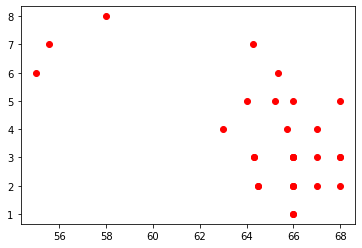

In [42]:
plt.plot(sku_01326007f9['avg_final_unit_price'], sku_01326007f9['total_quantity'],'ro')
plt.show()